## Cosine Similarity Calculations
Cosine similarity is a measure of similarity between two non-zero vectors of an inner product space that measures the cosine of the angle between them. Similarity measures have a multiude of uses in machine learning projects; they come in handy when matching strings, measuring distance, and extracting features. This similarity measurement is particularly concerned with orientation, rather than magnitude. 
In this case study, you'll use the cosine similarity to compare both a numeric data within a plane and a text dataset for string matching.

Load the Python modules, including cosine_similarity, from sklearn.metrics.pairwise

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
%matplotlib inline
plt.style.use('ggplot')
from scipy import spatial
from sklearn.metrics.pairwise import cosine_similarity

**<font color='teal'> Load the distance dataset into a dataframe. </font>**

In [5]:
df = pd.read_csv('data/distance_dataset (1).csv', index_col='Unnamed: 0')

In [7]:
df.head()

,X,Y,Z,ClusterID
0,5.135779,4.167542,5.787635,4
1,4.280721,5.770909,6.091044,4
2,8.329098,7.540436,3.247239,2
3,5.470224,5.069249,5.768313,4
4,2.381797,2.402374,3.879101,1


### Cosine Similarity with clusters and numeric matrices

All points in our dataset can be thought of as feature vectors. We illustrate it here as we display the __Cosine Similarity__ between each feature vector in the YZ plane and the [5, 5] vector we chose as reference. The sklearn.metrics.pairwise module provides an efficient way to compute the __cosine_similarity__ for large arrays from which we can compute the similarity.

 **<font color='teal'> First, create a 2D and a 3D matrix from the dataframe. The 2D matrix should contain the 'Y' and 'Z' columns and the 3D matrix should contain the 'X','Y', and 'Z' columns.</font>**

In [29]:
df_2D = df[['Y','Z']]
df_3D = df[['X','Y','Z']]

Calculate the cosine similarity for those matrices with reference planes of 5,5 and 5,5,5. Then subtract those measures from 1 in new features.

In [30]:
simCosine3D = 1. - cosine_similarity(df_3D, [[5,5,5]], 'cosine')
simCosine = 1. - cosine_similarity(df_2D, [[5,5]], 'cosine')

Using the 2D matrix and the reference plane of (5,5) we can use a scatter plot to view the way the similarity is calculated using the Cosine angle.

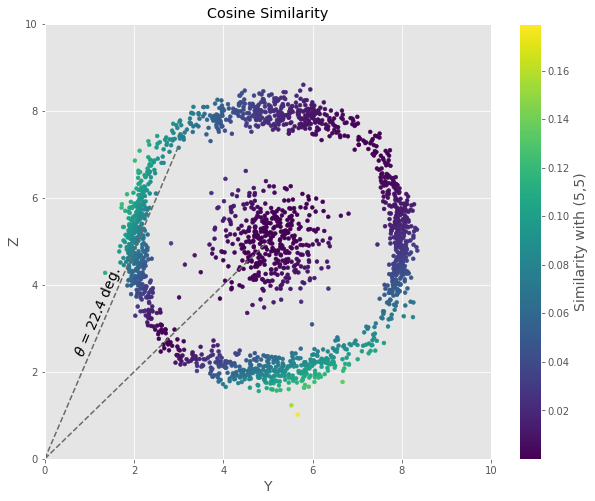

In [39]:
figCosine = plt.figure(figsize=[10,8])

plt.scatter(df_2D.Y, df_2D.Z, c=simCosine[:,0], s=15)
plt.plot([0,5],[0,5], '--', color='dimgray')
plt.plot([0,3],[0,7.2], '--', color='dimgray')
plt.text(0.6,2.4,r'$\theta$ = 22.4 deg.', rotation=67, size=14)
plt.ylim([0,10])
plt.xlim([0,10])
plt.xlabel('Y', size=14)
plt.ylabel('Z', size=14)
plt.title('Cosine Similarity')
cb = plt.colorbar()
cb.set_label('Similarity with (5,5)', size=14)

figCosine.savefig('img/similarity-cosine.png')

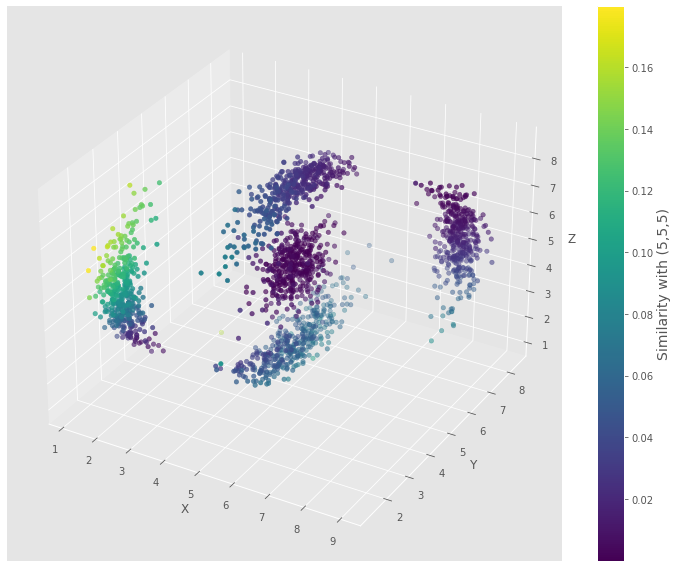

In [33]:
from mpl_toolkits.mplot3d import Axes3D
figCosine3D = plt.figure(figsize=(10, 8))
ax = figCosine3D.add_subplot(111, projection='3d')

p = ax.scatter(df_3D.iloc[:,0], df_3D.iloc[:,1], df_3D.iloc[:,2], c=simCosine3D[:,0])
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
cb = figCosine3D.colorbar(p)
cb.set_label('Similarity with (5,5,5)', size=14)
                                   
figCosine3D.tight_layout()
figCosine3D.savefig('img/cosine-3D.png', dpi=300, transparent=True)

----

### Cosine Similarity with text data
This is a quick example of how you can use Cosine Similarity to compare different text values or names for record matching or other natural language proecessing needs. 
First, we use count vectorizer to create a vector for each unique word in our Document 0 and Document 1. 

In [23]:
from sklearn.feature_extraction.text import CountVectorizer
count_vect = CountVectorizer()
Document1 = "Starbucks Coffee"
Document2 = "Essence of Coffee"

corpus = [Document1,Document2]

X_train_counts = count_vect.fit_transform(corpus)

pd.DataFrame(X_train_counts.toarray(),columns=count_vect.get_feature_names(),index=['Document 0','Document 1'])

,coffee,essence,of,starbucks
Document 0,1,0,0,1
Document 1,1,1,1,0


Now, we use a common frequency tool called TF-IDF to convert the vectors to unique measures.

In [24]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()
trsfm=vectorizer.fit_transform(corpus)
pd.DataFrame(trsfm.toarray(),columns=vectorizer.get_feature_names(),index=['Document 0','Document 1'])

,coffee,essence,of,starbucks
Document 0,0.579739,0.000000,0.000000,0.814802
Document 1,0.449436,0.631667,0.631667,0.000000


Here, we finally apply the __Cosine Similarity__ measure to calculate how similar Document 0 is compared to any other document in the corpus. Therefore, the first value of 1 is showing that the Document 0 is 100% similar to Document 0 and 0.26055576 is the similarity measure between Document 0 and Document 1.

In [25]:
cosine_similarity(trsfm[0:1], trsfm)

array([[1.        , 0.26055567]])

Replace the current values for `Document 0` and `Document 1` with your own sentence or paragraph and apply the same steps as we did in the above example.

 **<font color='teal'> Combine the documents into a corpus.</font>**

In [40]:
Document1 = '''commonly referred to as Barcelona and colloquially known as Barça ([ˈbaɾsə]), is a Spanish professional football club based in Barcelona.

Founded in 1899 by a group of Swiss, Spanish, English, and Catalan footballers led by Joan Gamper, the club has become a symbol of Catalan culture and Catalanism, hence the motto "Més que un club" ("More than a club"). Unlike many other football clubs, the supporters own and operate Barcelona. It is the fourth-most valuable sports team in the world, worth $4.06 billion, and the world's richest football club in terms of revenue, with an annual turnover of €840,8 million.[2][3] The official Barcelona anthem is the "Cant del Barça", written by Jaume Picas and Josep Maria Espinàs.[4]

Domestically, Barcelona has won a record 74 trophies: 26 La Liga, 30 Copa del Rey, 13 Supercopa de España, 3 Copa Eva Duarte, and 2 Copa de la Liga trophies, as well as being the record holder for the latter four competitions. In international club football, the club has won 20 European and worldwide titles: 5 UEFA Champions League titles, a record 4 UEFA Cup Winners' Cup, a joint record 5 UEFA Super Cup, a record 3 Inter-Cities Fairs Cup, and 3 FIFA Club World Cup.[5] Barcelona was ranked first in the International Federation of Football History & Statistics Club World Ranking for 1997, 2009, 2011, 2012, and 2015[6][7] and currently occupies the third position on the UEFA club rankings.[8] The club has a long-standing rivalry with Real Madrid, and matches between the two teams are referred to as El Clásico.

Barcelona is one of the most widely supported teams in the world, and the club has one of the largest social media following in the world among sports teams.[9][10] Barcelona players have won a record number of Ballon d'Or awards (12), with recipients including Johan Cruyff, as well as a record number of FIFA World Player of the Year awards (7), with winners including Ronaldo, Romário, Ronaldinho, and Rivaldo. In 2010, three players who came through the club's youth academy (Lionel Messi, Andrés Iniesta, and Xavi) were chosen as the three best players in the world in the FIFA Ballon d'Or awards, an unprecedented feat for players from the same football school. Additionally, players representing the club have won a record number (8) of European Golden Shoe awards.

Barcelona is one of three founding members of the Primera División that have never been relegated from the top division since its inception in 1929, along with Athletic Bilbao and Real Madrid. In 2009, Barcelona became the first Spanish club to win the continental treble consisting of La Liga, Copa del Rey, and the UEFA Champions League, and also became the first Spanish football club to win six out of six competitions in a single year, by also winning the Spanish Super Cup, UEFA Super Cup, and FIFA Club World Cup.[11] In 2011, the club became European champions again and won five trophies. This Barcelona team, which won 14 trophies in just 4 years under Pep Guardiola, is considered by some in the sport to be the greatest team of all time.[12][13][14] By winning their fifth Champions League trophy on 6 June 2015, Barcelona became the first European club in history to achieve the continental treble twice. The highest paid sports team in the world, in November 2018 Barcelona became the first sports team with average first-team pay in excess of £10m ($13.8m) per year'''


Document2 = '''"Royal Spanish Sports Club of Barcelona"), commonly known as Espanyol, is a professional sports club based in Barcelona, Spain.

Founded in 1900, the club plays in the Segunda División for the 2020–21 season, the second division of Spanish football, having been relegated from La Liga in the 2019–20 season. They play their home games at the RCDE Stadium, which holds up to 40,000 spectators. Espanyol has won the Copa del Rey four times, most recently in 2006, and reached the UEFA Cup final in 1988 and 2007. The team competes in the Barcelona Derby against FC Barcelona. 
Initially known as the Sociedad Española de Football on its foundation, the name was changed to Club Español de Fútbol in 1901. In 1906, the club folded due to financial reasons and most of the players joined the X Sporting Club [ca]. This club won the Campionat de Catalunya three times between 1906 and 1908. In 1909, the club was effectively relaunched as the Club Deportivo Español, and in 1910, they adopted their present-day colours. Espanyol is one of several Spanish football clubs granted patronage by the Spanish crown and thus entitled to use Real in their names and the royal crown on their badge. This right was granted to Espanyol in 1912 by Alfonso XIII and the club subsequently became known as the Real Club Deportivo Español.[2]

Following the abdication of the same king in 1931 and the declaration of the Second Spanish Republic, due to prohibition of royal symbols, the club adopted the more Catalan/republican friendly name, Club Esportiu Espanyol. After the Spanish Civil War, the name was reverted.

The club took the Catalan spelling for its name in February 1995. The word "Deportiu" in Reial Club Deportiu Espanyol de Barcelona is a Catalanised form of the original word "Deportivo" (Castilian), despite the correct word being "Esportiu" in the Catalan language. This choice was made in order to retain the initials "RCD" in the club's name. '''

In [43]:
corpus = [Document1,Document2]

 **<font color='teal'> Apply the count vectorizer to the corpus to transform it into vectors.</font>**

In [44]:
X_train_counts = count_vect.fit_transform(corpus)

 **<font color='teal'> Convert the vector counts to a dataframe with Pandas.</font>**

In [45]:
pd.DataFrame(X_train_counts.toarray(),columns=count_vect.get_feature_names(),index=['Document 0','Document 1'])

,000,06,10,10m,11,12,13,14,1899,1900,...,world,worldwide,worth,written,xavi,xiii,year,years,youth,ˈbaɾsə
Document 0,0,1,1,1,1,2,3,2,1,0,...,10,1,1,1,1,0,3,1,1,1
Document 1,1,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0


 **<font color='teal'> Apply TF-IDF to convert the vectors to unique frequency measures.</font>**

In [46]:
trsfm=vectorizer.fit_transform(corpus)
pd.DataFrame(trsfm.toarray(),columns=vectorizer.get_feature_names(),index=['Document 0','Document 1'])

,000,06,10,10m,11,12,13,14,1899,1900,...,world,worldwide,worth,written,xavi,xiii,year,years,youth,ˈbaɾsə
Document 0,0.000000,0.019129,0.019129,0.019129,0.019129,0.038258,0.057387,0.038258,0.019129,0.000000,...,0.19129,0.019129,0.019129,0.019129,0.019129,0.000000,0.057387,0.019129,0.019129,0.019129
Document 1,0.025819,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.025819,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.025819,0.000000,0.000000,0.000000,0.000000


 **<font color='teal'> Use the cosine similarity function to get measures of similarity for the sentences or paragraphs in your original document.</font>**

In [47]:
cosine_similarity(trsfm[0:1], trsfm)

array([[1.        , 0.75434399]])